**Caso: diabetes**

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\SOCIAL DATA'

In [3]:
data = pd.read_excel("diabetes_py.xlsx")

In [4]:
data.head(n=3)

,clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199


**target**: "1"= normal; "2"=pre-diabético; "3"=diabético

**particionamiento de los datos**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x= data.iloc[:,1:4].values
y= data.iloc[:,0].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=2023)

**modelo de árbol de decisión**

In [12]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [13]:
model = DecisionTreeClassifier(criterion="entropy",
                              max_depth=3,
                              random_state=2023)

In [14]:
model_fit=model.fit(x_train,y_train)

In [ ]:
#pip install graphviz

In [15]:
import graphviz
from sklearn.tree import export_graphviz
from subprocess import check_call

In [17]:
predictores = data.columns.tolist()[1:4];print(predictores)

['glucosa', 'insulina', 'sspg']


In [18]:
with open("bupa_dtree.dot","w") as dotfile:
    export_graphviz(model_fit, out_file=dotfile, feature_names=predictores)

In [20]:
os.getcwd()

'C:\\Users\\SOCIAL DATA'

In [29]:
file = open("bupa_dtree.dot","r")

In [30]:
text = file.read()

In [31]:
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="insulina <= 431.0\\nentropy = 1.405\\nsamples = 92\\nvalue = [53, 21, 18]"] ;\n1 [label="insulina <= 420.5\\nentropy = 0.133\\nsamples = 54\\nvalue = [53, 1, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 52\\nvalue = [52, 0, 0]"] ;\n1 -> 2 ;\n3 [label="glucosa <= 97.5\\nentropy = 1.0\\nsamples = 2\\nvalue = [1, 1, 0]"] ;\n1 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0, 0]"] ;\n3 -> 5 ;\n6 [label="glucosa <= 117.0\\nentropy = 0.998\\nsamples = 38\\nvalue = [0, 20, 18]"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="entropy = 0.0\\nsamples = 20\\nvalue = [0, 20, 0]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 18\\nvalue = [0, 0, 18]"] ;\n6 -> 8 ;\n}'

In [24]:
from graphviz import Source

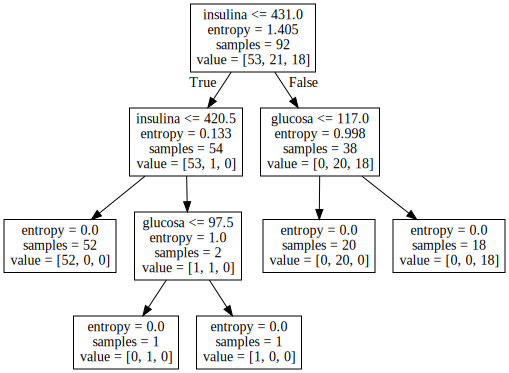

In [34]:
Source(text)

In [ ]:
x1= glucosa
x2= insulina
x3= sspg

**Interpretabilidad: generar reglas por el modelo aplicadas al negocio**

y ~ x2(insulina)

In [ ]:
Pr(y=1|x2<=431)=0.981
Pr(y=2|x2<=431)=0.018
Pr(y=3|x2<=431)=0
Pr(y=1|x2> 431)=0
Pr(y=2|x2> 431)=0.526
Pr(y=3|x2> 431)=0.474

y ~ x2(insulina) + x1(glucosa)

In [ ]:
Pr(y=1|x2> 431 & x1<= 117)=0
Pr(y=2|x2> 431 & x1<= 117)=1
Pr(y=3|x2> 431 & x1<= 117)=0
Pr(y=1|x2> 431 & x1>  117)=0
Pr(y=2|x2> 431 & x1>  117)=0
Pr(y=3|x2> 431 & x1>  117)=1

In [45]:
model = DecisionTreeClassifier(criterion="entropy",
                              max_depth=3,
                              random_state=2023)

**Recordemos**: si existe el problema de varianza interna en el modelo de árboles es mejor aplicar un modelo de ensamble (random forest o XGBoost, entre otros)

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
scores = cross_val_score(model,
                        x_train,
                        y_train,
                        scoring="accuracy",
                        cv=5)

In [48]:
scores

array([1.        , 0.94736842, 1.        , 0.94444444, 1.        ])

In [49]:
scores.mean()

0.9783625730994151

El modelo logra predecir 96 de cada 100 casos (registros)

**árboles de decisión**

**Problema**: incremento de la profundidad de un árbol (incremento de la complejidad del modelo) puede generar un problema de varianza interna en los datos.

In [ ]:
ID   Ingreso     Consumo    hrs     Promedio      | Fuga (Churn_est)
1
2
3
4
5
.
.
.
100

train: 70%
test: 30%

In [ ]:
seg 1= 55%
seg 2= 98%
seg 3= 80%
seg 4= 77%
seg 5= 91%

In [ ]:
**Sensibilidad** 85% casos positivos (fuga clientes)

**Bagging**

Los teóricos de Bagging proponen agregar Bootstrap a los modelos de árboles

In [ ]:
m1 = x1 + x5
m2 = x5 + x8
m3 = x1 + x5
m4 = x1 + x5
.
.
.
m100 = x1 + x3

**voto mayoritario**: x1 + x5

**Solución**: ayudaron a controlar el problema de varianza interna

**Problema**: árboles generados por Bagging estaban correlacionados

**Random forest**

- Boostrap (a las observaciones) + raiz cuadrada de los "p" predictores

In [ ]:
m_1 | x1 x5 x7 x9 x15 x30 ~ y ---> se aplica árboles a estos datos
m_2 | x2 x9 x17 x19 x25 x31 ~ y ---> se aplica árboles a estos datos
m_3 | x3 x8 x17 x19 x22 x29 ~ y ---> se aplica árboles a estos datos
.
.
.
m_100 | x1 x4 x17 x21 x25 x30 ~ y ---> se aplica árboles a estos datos

**Voto mayoritario**

In [52]:
import math as m
round(m.log2(36))

5

In [53]:
round(m.sqrt(36))

6

**Caso: fuga de clientes**

In [54]:
import pandas as pd

In [55]:
data = pd.read_csv("D:/mymodel/Churn.csv")

In [56]:
data.head()

,TARGET_MOD1,PCT_COMISIONES_PAGO_UM,DEUDA_VIG,ADICIONALES_ACTIVAS,DIAS_MORA,NUM_TC_ACTIVAS,TOTAL_TIEMPO_SOLUCION_UM,TOT_PRODUCTOS,IMPORTE_MEMBRESIA_UM,MESES_EXPIRACION,...,SAL_MES_PP,CLF_IBK,PROM_MTO_6UM,MONTO_PAGOS_UM,EMP_MAYLINEA_UM,NUM_VOLUNTARIA_UM,REGION,NUM_TRX_UM,SEGMENTO_BANCO,FLG_TRAIN
0,0,0.875648,2338.80,0,0,2,0.0,4,0,0,...,0.0,0,2400.000000,0.0,IBK,0,LIMA NORTE,1,2,1
1,0,0.051539,112.24,0,0,1,0.0,2,0,0,...,0.0,0,794.258333,0.0,IBK,0,CENTRO SUR,4,3,1
2,0,1.000000,97.79,0,0,1,0.0,1,0,0,...,0.0,2,501.450000,0.0,OTROS,0,CENTRO SUR,0,2,1
3,0,0.131875,1423.26,0,0,1,0.0,2,0,0,...,0.0,0,1826.080000,0.0,OTROS,0,LIMA NORTE,11,3,1
4,0,1.000000,726.06,0,0,1,0.0,5,0,0,...,0.0,0,842.035000,0.0,IBK,0,LIMA CENTRO,10,3,1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179628 entries, 0 to 179627
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARGET_MOD1               179628 non-null  int64  
 1   PCT_COMISIONES_PAGO_UM    179628 non-null  float64
 2   DEUDA_VIG                 179628 non-null  float64
 3   ADICIONALES_ACTIVAS       179628 non-null  int64  
 4   DIAS_MORA                 179628 non-null  int64  
 5   NUM_TC_ACTIVAS            179628 non-null  int64  
 6   TOTAL_TIEMPO_SOLUCION_UM  179628 non-null  float64
 7   TOT_PRODUCTOS             179628 non-null  int64  
 8   IMPORTE_MEMBRESIA_UM      179628 non-null  int64  
 9   MESES_EXPIRACION          179628 non-null  int64  
 10  TOTAL_DURACION_6UM        179628 non-null  int64  
 11  MTOPAGOMESTOT_UM          179628 non-null  float64
 12  NUM_TC_6UM                179628 non-null  int64  
 13  ANTIGUEDAD_ACTIVA         179628 non-null  f

In [61]:
pd.value_counts(data["TARGET_MOD1"])/len(data)*100

0    68.921326
1    31.078674
Name: TARGET_MOD1, dtype: float64

**FLG_TRAIN**

- 1:train (enero a agosto de 2018)
- 0:test (septiembre 2018 a febrero 2019)

In [62]:
train = data.loc[(data["FLG_TRAIN"]==1)]

In [63]:
test = data.loc[(data["FLG_TRAIN"]==0)]

In [64]:
len(train)

109722

In [65]:
len(test)

69906

In [66]:
train = train.drop(["FLG_TRAIN"],axis=1)

In [67]:
test = test.drop(["FLG_TRAIN"],axis=1)

**Segmento banco (SEGMENTO_BANCO)**

In [69]:
pd.value_counts(data["SEGMENTO_BANCO"])

3      90790
2      45346
1A     23598
1BC     9718
4       4063
6       3489
5       2624
Name: SEGMENTO_BANCO, dtype: int64

In [70]:
pd.value_counts(train["SEGMENTO_BANCO"])

3      53004
2      29078
1A     10599
1BC     9093
4       3636
5       2624
6       1688
Name: SEGMENTO_BANCO, dtype: int64

In [71]:
pd.value_counts(test["SEGMENTO_BANCO"])

3      37786
2      16268
1A     12999
6       1801
1BC      625
4        427
Name: SEGMENTO_BANCO, dtype: int64

**ingenieria de características**

In [73]:
train["SEGMENTO_BANCO"]=train["SEGMENTO_BANCO"].replace("1A",7)


In [74]:
train["SEGMENTO_BANCO"]=train["SEGMENTO_BANCO"].replace("1BC",8)

In [75]:
test["SEGMENTO_BANCO"]=test["SEGMENTO_BANCO"].replace("1A",7)
test["SEGMENTO_BANCO"]=test["SEGMENTO_BANCO"].replace("1BC",8)

In [76]:
#cambio de formato

In [77]:
train["SEGMENTO_BANCO"]=train["SEGMENTO_BANCO"].astype("int32")

In [78]:
test["SEGMENTO_BANCO"]=test["SEGMENTO_BANCO"].astype("int32")

**Codificación de variables**

In [79]:
list_text = ["EMP_MAYLINEA_UM","REGION"]

In [80]:
from collections import defaultdict

In [81]:
from sklearn import preprocessing

In [82]:
d=defaultdict(preprocessing.LabelEncoder)

In [83]:
fit = train.apply(lambda x: d[x.name].fit_transform(x) if x.name in list_text else x)

In [84]:
train=train.apply(lambda x: d[x.name].transform(x) if x.name in list_text else x)

In [85]:
test=test.apply(lambda x: d[x.name].transform(x) if x.name in list_text else x)

**árboles de decisión vs. random forest**

In [86]:
from sklearn.model_selection import GridSearchCV #función para optimizar hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
tree = DecisionTreeClassifier(criterion="entropy",
                             random_state=2023)

In [88]:
param_grid = {"max_depth":[2,3,4,5,6,7,8,9,10]}

In [89]:
model_tree = GridSearchCV(tree, param_grid,
                         cv=10,
                         scoring="recall")

**Nota**: la selección de la metrica objetivo (de comparación) depende del caso de negocio

In [90]:
x_train, y_train = train.iloc[:,1:].values, train.iloc[:,0].values

In [91]:
x_test, y_test = test.iloc[:,1:].values, test.iloc[:,0].values

In [92]:
model_tree.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=2023),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall')

In [93]:
print(model_tree.best_params_)

{'max_depth': 4}


In [95]:
tree = DecisionTreeClassifier(criterion="entropy",
                              max_depth=4,
                             random_state=2023)

In [96]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2023)

**Random forest**

In [97]:
model_f = RandomForestClassifier(random_state=2023,
                                criterion="entropy")

In [98]:
param_grid = {"max_depth":[2,3,4,5],
             "n_estimators":[100,150],
             "max_features":["auto","log2"]}

In [99]:
model_RF = GridSearchCV(model_f,
                        param_grid,
                        cv=10,
                        scoring="recall")

In [ ]:
model_RF.fit(x_train, y_train)

In [ ]:
print(model_RF.best_params_)